In [1]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import pandas as pd

In [3]:
df=pd.read_csv('./data/total_df.csv', encoding='cp949')
df

,기준_날짜시간,time,요일,대여소_ID,대여소명,전체_건수,평균_이용_분,평균_이용_거리,표준버스정류장ID,버스 수,버스_하차승객수,역명,지하철하차승객수,강수,기온,풍속,dem
0,2022-03-11 00:00:00,0,금,ST-1816,혜화동,1,8.0,0.000,100000003,16.0,5.227468,혜화,21.131418,0.0,9.400000,2.3,39.42
1,2022-04-08 00:00:00,0,금,ST-1816,혜화동,1,49.0,9283.680,100000003,16.0,6.397627,혜화,16.173878,0.0,13.100000,1.1,39.42
2,2022-04-15 00:00:00,0,금,ST-173,혜화동,1,3.0,861.770,100000003,16.0,6.340281,혜화,15.970809,0.0,14.600000,1.8,33.97
3,2022-04-15 00:00:00,0,금,ST-1816,혜화동,1,23.0,3591.920,100000003,16.0,6.340281,혜화,15.970809,0.0,14.600000,1.8,39.42
4,2022-04-22 00:00:00,0,금,ST-1816,혜화동,2,3.0,815.000,100000003,16.0,6.457268,혜화,16.436237,0.0,16.700001,3.8,39.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9224128,2022-08-16 23:00:00,23,화,ST-1835,명일2동,2,7.0,1270.000,124900134,1.0,2.903537,굽은다리,260.413506,0.0,26.400000,1.3,30.68
9224129,2022-08-23 23:00:00,23,화,ST-1835,명일2동,1,15.0,3335.140,124900134,1.0,2.025723,굽은다리,263.774978,0.0,24.500000,1.8,30.68
9224130,2022-09-06 23:00:00,23,화,ST-1835,명일2동,4,18.5,2006.385,124900134,1.0,2.682043,굽은다리,269.950545,0.0,22.500000,0.5,30.68
9224131,2022-09-13 23:00:00,23,화,ST-1835,명일2동,2,19.5,2747.945,124900134,1.0,2.072488,굽은다리,276.214963,0.0,24.500000,2.0,30.68


In [5]:
df.isnull().sum()

기준_날짜시간      0
time         0
요일           0
대여소_ID       0
대여소명         0
전체_건수        0
평균_이용_분      0
평균_이용_거리     0
표준버스정류장ID    0
버스 수         0
버스_하차승객수     0
역명           0
지하철하차승객수     0
강수           0
기온           0
풍속           0
dem          0
dtype: int64

In [6]:
df['강수'].unique()

array([ 0.      , -1.      ,  1.5     ,  0.5     ,  1.      ,  8.2     ,
        6.      ,  7.5     ,  9.      ,  5.5     ,  4.5     ,  5.      ,
        4.      ,  2.5     , 13.5     ,  7.      , 18.5     , 17.      ,
       15.      , 13.      , 10.5     , 11.5     ,  8.5     , 11.      ,
        2.      ,  2.3     ,  0.9     ,  0.4     ,  3.      ,  3.5     ,
        8.      ,  9.5     , 19.5     ,  6.5     ,  0.1     , 10.      ,
       12.5     ,  1.8     ,  1.2     ,  2.7     , 19.299999, 20.5     ,
       14.5     , 19.      , 15.5     ,  1.9     , 16.5     , 18.      ,
       17.5     , 21.5     , 14.      , 12.      , 16.      , 26.      ,
       27.      , 21.      ,  0.2     ,  0.8     ,  1.7     ,  8.8     ,
        2.1     , 45.5     ,  3.3     ,  2.8     ,  7.2     ,  0.7     ,
        2.2     ,  1.3     ,  2.6     ,  0.6     ,  5.6     ,  5.2     ,
        4.7     ,  6.8     , 31.5     , 46.      ,  4.9     ,  0.3     ,
        3.2     , 41.      , 11.7     , 27.5     , 

In [8]:
df['강수']=df['강수'].round(1)

In [43]:
df_rain=pd.pivot_table(df, index='강수', values='전체_건수', aggfunc='count')

In [44]:
df_rain.reset_index(inplace=True)

In [45]:
import matplotlib.pyplot as plt

In [46]:
df_rain

,강수,전체_건수
0,-1.0,31859
1,-0.9,82
2,0.0,8750249
3,0.1,6378
4,0.2,3655
...,...,...
197,77.0,50
198,81.5,7
199,82.5,69
200,83.5,67


In [47]:
df_rain['전체_건수'].describe()

count    2.020000e+02
mean     4.566402e+04
std      6.156008e+05
min      1.000000e+00
25%      3.400000e+01
50%      1.395000e+02
75%      5.752500e+02
max      8.750249e+06
Name: 전체_건수, dtype: float64

(0.0, 5000.0)

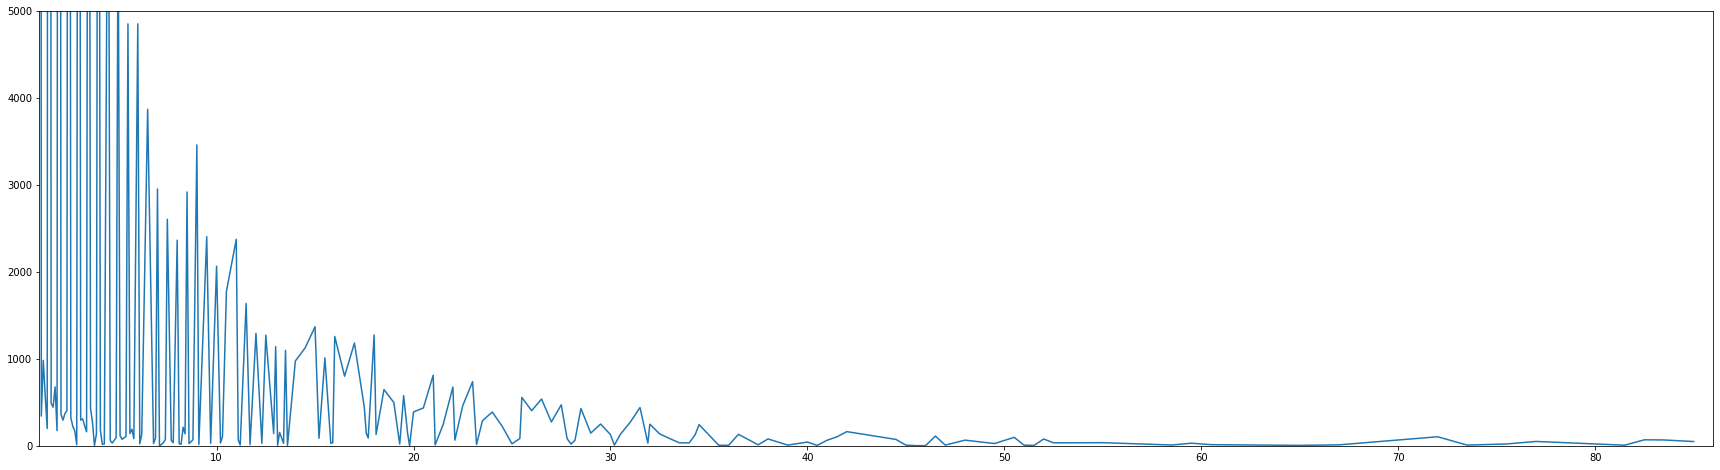

In [63]:
plt.figure(figsize=(30,8))
plt.plot(df_rain['강수'],df_rain['전체_건수'])
plt.xlim(1,86)
plt.ylim(0,5000)

In [40]:
df_rain.sort_values(by='전체_건수', ascending=False)

,강수,전체_건수
99,13.2,7.285714
179,46.5,7.232143
36,3.4,7.180124
173,41.5,5.194175
114,17.6,4.993197
...,...,...
177,45.5,1.000000
176,45.0,1.000000
90,11.2,1.000000
169,39.0,1.000000


In [53]:
df[(df['강수']>=46.50) & (df['강수']<47.50)].shape

(120, 17)

In [ ]:
df[(df['강수']>=46.50) & (df['강수']<47.50)].shape

---------------

In [64]:
df_rain_n=pd.pivot_table(df, index=['기준_날짜시간','강수'], values='전체_건수', aggfunc='sum')
df_rain_n

,,전체_건수
기준_날짜시간,강수,
2022-01-01 00:00:00,0.0,587
2022-01-01 01:00:00,0.0,476
2022-01-01 02:00:00,0.0,333
2022-01-01 03:00:00,0.0,250
2022-01-01 04:00:00,0.0,248
...,...,...
2022-09-30 19:00:00,0.0,13648
2022-09-30 20:00:00,0.0,11246
2022-09-30 21:00:00,0.0,10580


In [66]:
df_rain_n.reset_index(inplace=True)

In [67]:
df_rain_n

,기준_날짜시간,강수,전체_건수
0,2022-01-01 00:00:00,0.0,587
1,2022-01-01 01:00:00,0.0,476
2,2022-01-01 02:00:00,0.0,333
3,2022-01-01 03:00:00,0.0,250
4,2022-01-01 04:00:00,0.0,248
...,...,...,...
10282,2022-09-30 19:00:00,0.0,13648
10283,2022-09-30 20:00:00,0.0,11246
10284,2022-09-30 21:00:00,0.0,10580
10285,2022-09-30 22:00:00,0.0,9239


In [73]:
df_rain_n['강수']=df_rain_n['강수'].astype(int)
graph=pd.pivot_table(df_rain_n, index='강수',values='전체_건수',aggfunc='mean')
graph

,전체_건수
강수,
-1,3429.611111
0,4212.484763
1,530.897036
2,413.334107
3,431.668790
...,...
77,77.000000
81,15.000000
82,115.000000


In [77]:
graph.reset_index(inplace=True)
graph

,강수,전체_건수
0,-1,3429.611111
1,0,4212.484763
2,1,530.897036
3,2,413.334107
4,3,431.668790
...,...,...
62,77,77.000000
63,81,15.000000
64,82,115.000000
65,83,110.000000


In [89]:
graph.sort_values(by='전체_건수', ascending=False).head(10)

,강수,전체_건수
1,0,4212.484763
0,-1,3429.611111
2,1,530.897036
4,3,431.668790
3,2,413.334107
46,46,406.000000
5,4,331.206478
42,41,312.500000
29,28,234.571429
32,31,230.111111


In [84]:
graph.describe()

,강수,전체_건수
count,67.000000,67.000000
mean,34.716418,239.229807
std,23.767055,646.310852
min,-1.000000,5.000000
25%,15.500000,47.750000
50%,32.000000,119.888889
75%,49.500000,178.860510
max,85.000000,4212.484763


(0.0, 600.0)

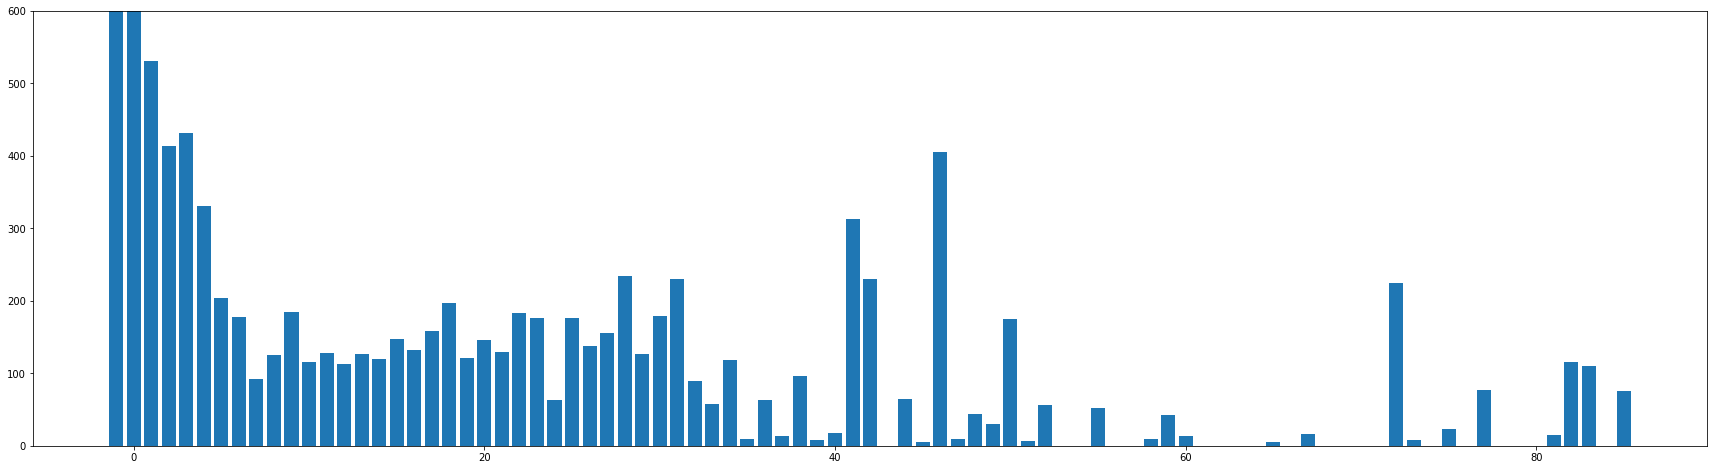

In [85]:
plt.figure(figsize=(30,8))
plt.bar(graph['강수'],graph['전체_건수'])
plt.ylim(0,600)

(167, 17)


<BarContainer object of 18 artists>

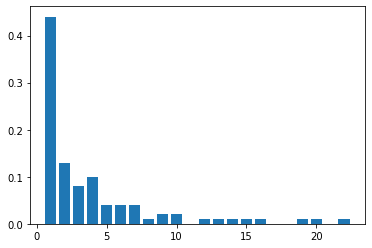

In [122]:
print(df[(df['강수']>=41) & (df['강수']<42)].shape)
a=df[(df['강수']>=41) & (df['강수']<42)]['전체_건수'].value_counts(normalize=True).round(2)
plt.bar(a.index, a)

(114, 17)


<BarContainer object of 21 artists>

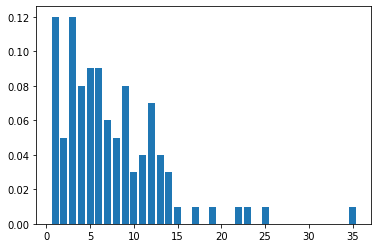

In [123]:
print(df[(df['강수']>=46) & (df['강수']<47)].shape)
a=df[(df['강수']>=46) & (df['강수']<47)]['전체_건수'].value_counts(normalize=True).round(2)
plt.bar(a.index, a)

(55874, 17)


<BarContainer object of 65 artists>

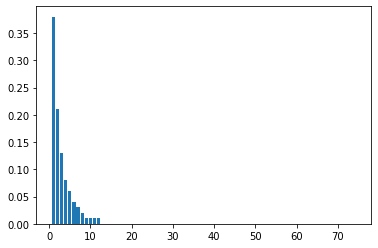

In [127]:
print(df[(df['강수']>=2) & (df['강수']<3)].shape)
a=df[(df['강수']>=2) & (df['강수']<3)]['전체_건수'].value_counts(normalize=True).round(2)
plt.bar(a.index, a)

In [125]:
df[(df['강수']>=46) & (df['강수']<47) & (df['전체_건수']==9)]

,기준_날짜시간,time,요일,대여소_ID,대여소명,전체_건수,평균_이용_분,평균_이용_거리,표준버스정류장ID,버스 수,버스_하차승객수,역명,지하철하차승객수,강수,기온,풍속,dem
6322994,2022-06-12 17:00:00,17,일,ST-257,자양1동,9,28.444444,2430.741111,104000094,3.0,42.934381,구의,996.867861,46.5,18.4,1.5,21.87
6323858,2022-06-12 17:00:00,17,일,ST-1263,군자동,9,8.222222,1021.654444,104000261,0.0,22.482750,군자,1143.024153,46.5,18.4,1.5,16.08
6376494,2022-06-12 17:00:00,17,일,ST-3070,풍납1동,9,71.000000,5030.308889,123000019,2.0,6.479372,강동구청,363.090306,46.5,18.4,1.5,16.83
6376777,2022-06-12 17:00:00,17,일,ST-2608,잠실4동,9,27.444444,2336.212222,123000034,9.0,37.366044,몽촌토성,249.797421,46.5,18.4,1.5,14.72
6376856,2022-06-12 17:00:00,17,일,ST-542,잠실4동,9,24.000000,3649.614444,123000040,6.0,8.080898,잠실나루,392.975366,46.5,18.4,1.5,14.75
6377008,2022-06-12 17:00:00,17,일,ST-2596,잠실6동,9,38.333333,5001.403333,123000046,3.0,59.318710,잠실,4470.809402,46.5,18.4,1.5,14.57
6377150,2022-06-12 17:00:00,17,일,ST-1088,잠실2동,9,34.888889,1457.764444,123000051,3.0,5.509151,잠실,4470.809402,46.5,18.4,1.5,14.31
6381847,2022-06-12 17:00:00,17,일,ST-2797,방이2동,9,11.888889,1842.095556,123000643,0.0,22.482750,몽촌토성,249.797421,46.5,18.4,1.5,14.81
6384339,2022-06-12 17:00:00,17,일,ST-1838,천호3동,9,15.222222,1294.280000,124000357,5.0,79.942078,강동,633.014070,46.5,18.4,1.5,19.80
